11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 49ms/step - accuracy: 0.8885 - loss: 0.3931 - val_accuracy: 0.9771 - val_loss: 0.0754
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 37s 49ms/step - accuracy: 0.9826 - loss: 0.0570 - val_accuracy: 0.9870 - val_loss: 0.0454
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 48ms/step - accuracy: 0.9901 - loss: 0.0315 - val_accuracy: 0.9856 - val_loss: 0.0486
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 43s 51ms/step - accuracy: 0.9921 - loss: 0.0244 - val_accuracy: 0.9890 - val_loss: 0.0388
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 49ms/step - accuracy: 0.9945 - loss: 0.0174 - val_accuracy: 0.9898 - val_loss: 0.0358
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 36s 48ms/step - accuracy: 0.9955 - loss: 0.0142 - val_accuracy: 0.9883 - val_loss: 0.0421
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 35s 46ms/step - accuracy: 0.9965 - loss: 0.0106 - val_accuracy: 0.9881 - val_loss: 0.0452
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 48ms/step - accuracy: 0.9972 - loss: 0.0093 - 

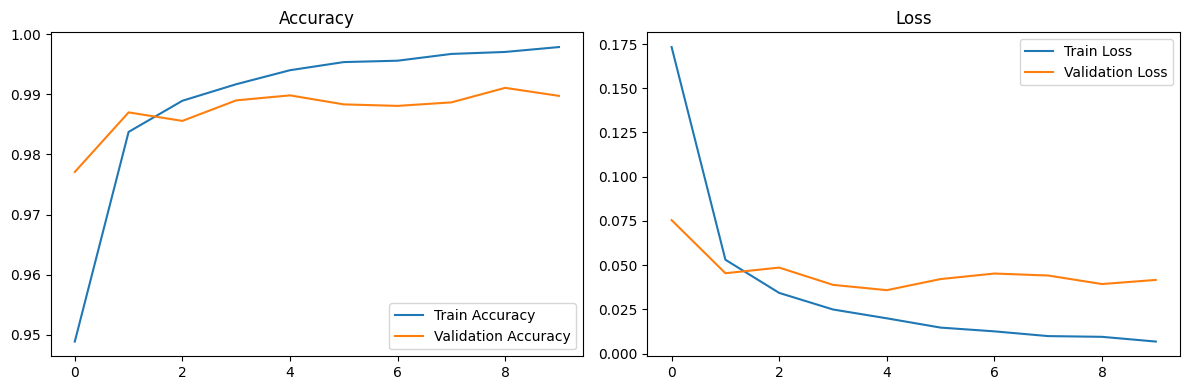

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

# Load MNIST data directly from Keras
def load_data():
    (X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

    # Normalize pixel values to [0, 1]
    X_train = X_train.astype('float32') / 255
    X_test = X_test.astype('float32') / 255

    # Reshape to 28x28x1 images
    X_train = np.expand_dims(X_train, -1)
    X_test = np.expand_dims(X_test, -1)

    # Convert labels to one-hot encoding
    y_train = keras.utils.to_categorical(y_train, 10)
    y_test = keras.utils.to_categorical(y_test, 10)

    return X_train, y_train, X_test, y_test

# Build the model (same as before)
def build_model():
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

    return model

# Train and evaluate
def main():
    X_train, y_train, X_test, y_test = load_data()

    model = build_model()
    model.summary()

    history = model.fit(X_train, y_train,
                       epochs=10,
                       batch_size=64,
                       validation_split=0.2)

    # Evaluate on test set
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print(f"\nTest accuracy: {test_acc:.4f}")

    # Plot training history
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title('Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title('Loss')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()